# Worksheet 14

Name: Patrick Browne  
UID: U45143184

### Topics

- Naive Bayes
- Model Evaluation

## Other notes from class

### Naive Bayes Notes
- We use Bayes' Theorem to determine the probability that a condition C is true, given all the other attribues we know about C
- Thus, we use what are called *Bayesian Classifiers* to predict the value of C
- To do this, we only need to maximize the numerator of the fraction (as the denominator does not depend on C) - namely, $P(A_1 \cap A_2 \cap ... \cap A_n \mid C) \cdot P(C)$
- We can estimate $P(C)$ using our dataset as $$\frac{\text{number of instances of C}}{\text{total number of instances}}$$
- This model is called "Naive Bayes" because we further estimate $P(A_1 \cap A_2 \cap ... \cap A_n \mid C)$ in a naive manner: we assume that events $A_1, A_2, .., A_n$ are all independent, and instead calculate: $$P(A_1 \mid C) \cdot P(A_2 \mid C) \cdot ... \cdot P(A_n \mid C)$$
- We want to use a Gaussian (normal) distribution for our continuous attributes (in the first table of the worksheet, we have categorical variables - what if they are quantifiable?)
- Limitation discussed at the end: if a single conditional probability ($P(A_i \mid C)$) is equal to zero, the whole probability becomes 0
    - We can use different estimates to account for this
    - This is usually only because our sample data is too sparse to cover every possible outcome
 
### Methods of Estimation notes
- We need to be able to evaluate our code for the midterm, rather than sending many requests to Kaggle to evaluate our predictions
- We can initialize our model with several different parameters, then perform a grid search to see which parameters perform best
    - This can involve a k-fold cross validation, where we partition our training dataset $k$ times, with each one having $k - 1$ training subsets and $1$ testing set
    - Leave-one-out is when we set $k = n$ (most extreme form of k-fold cross validation)
- Confusion matrices
    - Accuracy can be misleading
    - If we have 1,000,000 examples with 999,990 being A and 10 being B, and our model only outputs A, we have a good rate of predicting A (very high accuracy rate!), but are terrible about predicting B
    - This is where a confusion matrix can help
    - Equivalent of a matrix for Type 1/Type 2 error classification

### Ensemble Methods notes
- Need independent classifiers
- If we poll each classifier, the probability that the majority are wrong is far lower than the probability that a single classifier is wrong
- We do this with bagging & boosting
    - Bagging: train on "bootstrapped" samples - creates $n$ different samples for our model, and polls each of the $n$ classifiers that are trained on each sample to make a prediction
        - Our model below uses a bagging classifier
    - Boosting: Not covered, will get to next time
 
## **Note to reader** (for midterm):
Explore the data you are given, try to understand it and make sense of the data. Do not blindly apply these methods (and don't apply these until the end!). Review latent sematic analysis, SVD, and other code. Much of it will be relevant for the midterm.

### Naive Bayes

| Attribute A | Attribute B | Attribute C | Class |
|-------------|-------------|-------------|-------|
| Yes         | Single      | High        | No    |
| No          | Married     | Mid         | No    |
| No          | Single      | Low         | No    |
| Yes         | Married     | High        | No    |
| No          | Divorced    | Mid         | Yes   |
| No          | Married     | Low         | No    |
| Yes         | Divorced    | High        | No    |
| No          | Single      | Mid         | Yes   |
| No          | Married     | Low         | No    |
| No          | Single      | Mid         | Yes   |

a) Compute the following probabilities:

- P(Attribute A = Yes | Class = No)
- P(Attribute B = Divorced | Class = Yes)
- P(Attribute C = High | Class = No)
- P(Attribute C = Mid | Class = Yes)

- P(Attribute A = Yes | Class = No)
    - We calculate this using our eyes: P(A = Yes | Class = No) = (count A is Yes and class is No) / (count A is Yes)
    - This is equal to **0/3 = 0**
- P(Attribute B = Divorced | Class = Yes)
    - Again: (count B is Divorced and class is Yes) / (count B is Divorced)
    - **1/2**
- P(Attribute C = High | Class = No)
    - (count C is High and class is No) / (count C is High)
    - **3/3**
- P(Attribute C = Mid | Class = Yes)
    - (count C is Mid and class is Yes) / (cound C is Mid)
    - **3/4**

b) Classify the following unseen records:

- (Yes, Married, Mid)
  - P(yes | C = yes) * P(Married | C = yes) * P(Mid | C = yes) * P(yes)
  - P(yes | C = no) * P(Married | C = no) * P(Mid | C = no) * P(no)
- (No, Divorced, High)
  - P(no | C = yes) * P(Divorced | C = yes) * P(High | C = yes) * P(yes)
  - P(no | C = no) * P(Divorced | C = no) * P(High | C = no) * P(no)
- (No, Single, High)
  - P(no | C = yes) * P(Single | C = yes) * P(High | C = yes) * P(yes)
  - P(no | C = no) * P(Single | C = no) * P(High | C = no) * P(no)
- (No, Divorced, Low)
  - P(no | C = yes) * P(Divorced | C = yes) * P(Low | C = yes) * P(yes)
  - P(no | C = no) * P(Divorced | C = no) * P(Low | C = no) * P(no)

- (Yes, Married, Mid):
    - The probability where C = yes is:
$\frac{3}{3} \cdot \frac{0}{4} \cdot \frac{3}{4} \cdot \frac{3}{10} = 0$
    - For C = no, we get:
$\frac{0}{3} \cdot \frac{4}{4} \cdot \frac{1}{4} \cdot \frac{7}{10} = 0$
- (No, Divorced, High)
    - For C = yes, we get:
$\frac{3}{7} \cdot \frac{1}{2} \cdot \frac{0}{3} \cdot \frac{3}{10} = 0$
    - For C = no, we get:
$\frac{4}{7} \cdot \frac{1}{2} \cdot \frac{3}{3} \cdot \frac{7}{10} = \frac{2}{5}$ --> **NO**
- (No, Single, High)
    - For C = yes, we get:
$\frac{3}{7} \cdot \frac{2}{4} \cdot \frac{0}{3} \cdot \frac{3}{10} = 0$
    - For C = no, we get:
$\frac{4}{7} \cdot \frac{2}{4} \cdot \frac{3}{3} \cdot \frac{7}{10} = \frac{1}{5}$ --> **NO**
- (No, Divorced, Low)
    - For C = yes, we get:
$\frac{3}{7} \cdot \frac{1}{2} \cdot \frac{0}{3} \cdot \frac{3}{10} = 0$
    - For C = no, we get:
$\frac{4}{7} \cdot \frac{1}{2} \cdot \frac{3}{3} \cdot \frac{7}{10} = \frac{2}{5}$ --> **NO**

### Model Evaluation

a) Write a function to generate the confusion matrix for a list of actual classes and a list of predicted classes

In [25]:
actual_class = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_class = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]

def confusion_matrix(actual, predicted, output=False):
    # Count four possible probabilities
    # Variables are formatted as {predicted}_{actual}
    yes_yes, yes_no, no_no, no_yes = 0,0,0,0
    for i in range(len(actual)):
        if predicted[i] == "Yes":
            if actual[i] == predicted[i]:
                yes_yes += 1
            else:
                yes_no += 1
        else:
            if actual[i] == predicted[i]:
                no_no += 1
            else:
                no_yes += 1
                
    # Format printing
    if output:
        print("| Predicted |")
        print("|  Y     N  |")
        print("|-----------|--------")
        print(f"|  {yes_yes}  |  {no_yes}  | Y")
        print("|-----------|   Acutal")
        print(f"|  {yes_no}  |  {no_no}  | N")
    return [yes_yes, no_yes, yes_no, no_no]

confusion_matrix(actual_class, predicted_class, output=True)
print()

| Predicted |
|  Y     N  |
|-----------|--------
|  2  |  1  | Y
|-----------|   Acutal
|  3  |  4  | N



b) Assume you have the following Cost Matrix:

|            | predicted = Y | predicted = N |
|------------|---------------|---------------|
| actual = Y |       -1      |       5       |
| actual = N |        10     |       0       |

What is the cost of the above classification?

To calculate the cost, we don't perform real matrix multiplication - we multiply the similar entries in each matrix and sum the total.

$$C = (-1)(2) + (5)(1) + (10)(3) + (0)(4)$$
$$= 33$$

c) Write a function that takes in the actual values, the predictions, and a cost matrix and outputs a cost. Test it on the above example.

In [23]:
def cost(actual, predicted, cost_matrix):
    cost = 0
    con_matrix = confusion_matrix(actual, predicted)
    for i in range(4):
        cost += con_matrix[i] * cost_matrix[i]

    return cost

# Create cost matrix based on cell above
cost_matrix = [-1, 5, 10, 0]

cost(actual_class, predicted_class, cost_matrix)

33

d) Implement functions for the following:

- accuracy
- precision
- recall
- f-measure

and apply them to the above example.

In [31]:
def accuracy(con_matrix):
    correct = con_matrix[0] + con_matrix[3]
    total = correct + con_matrix[1] + con_matrix[2]
    return correct / total

def precision(con_matrix):
    a = con_matrix[0]
    c = con_matrix[2]
    return a / (a + c)

def recall(con_matrix):
    a = con_matrix[0]
    b = con_matrix[1]
    return a / (a + b)

def f_measure(con_matrix):
    p = precision(con_matrix)
    r = recall(con_matrix)
    return 2*r*p/(r + p)

con_matrix = confusion_matrix(actual_class, predicted_class)
print(f"Accuracy of above example: {accuracy(con_matrix)}")
print(f"Precision of above example: {precision(con_matrix)}")
print(f"Recall of above example: {recall(con_matrix)}")
print(f"F-measure of above example: {f_measure(con_matrix)}")

Accuracy of above example: 0.6
Precision of above example: 0.4
Recall of above example: 0.6666666666666666
F-measure of above example: 0.5


## Some useful code for the midterm

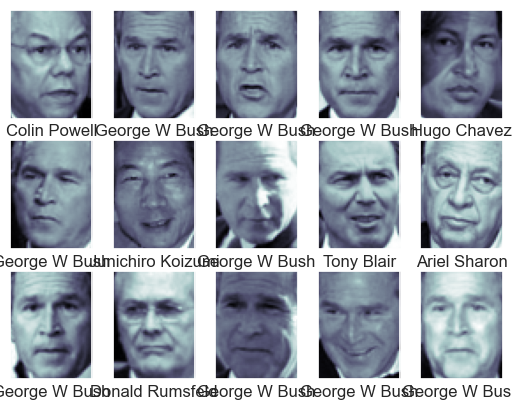

{'svc__C': 50, 'svc__gamma': 0.005}


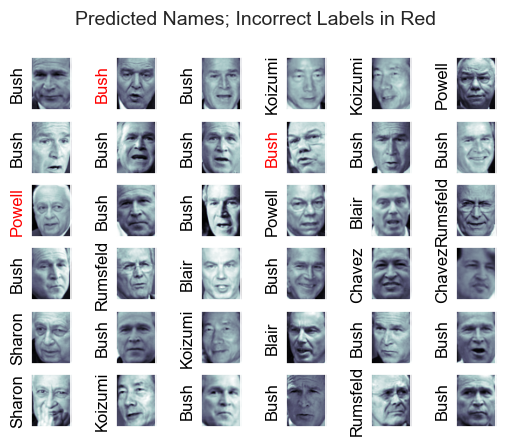

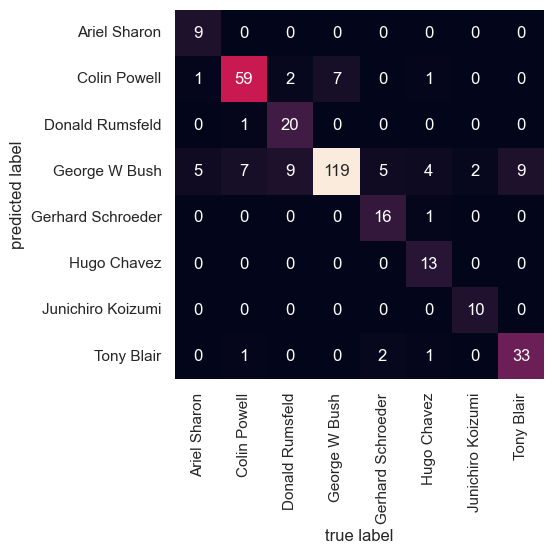

Accuracy =  0.827893175074184


In [1]:
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')

# Does feature reduction, then does support vector machines/classification
svcpca = make_pipeline(pca, svc)

# Tune model to find best values of C and gamma using cross validation
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

# Use gridsearch - search for the best parameters for our support vector machine
kfold = 10 # Use 10 training/testing set combinations
grid = GridSearchCV(svcpca, param_grid, cv=kfold)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)

# use the best params explicitly here
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.005)
svcpca = make_pipeline(pca, svc)

model = BaggingClassifier(svcpca, n_estimators=100).fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))